## **AI GENERATED IMAGE DETECTION**

**Problem Statement**

With the advent of generative AI, it has become easily difficult to separate real data from AI-Generated.
The goal is to develop a model that can identify a fake photo created by AI.

### **IMPORTING PACKAGES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import History

%matplotlib inline

/Users/Shriram/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### **LOAD TRAIN DATA**
* *A total of 5250 Data Points with 1200 features in the Training dataset*

In [2]:
df_train = pd.read_csv('Dataset/train.csv')

### **DATA PREPROCESSING**

##### Split train data into features and labels

In [3]:
imgFeaturesTrain = df_train.drop(['labels'], axis=1)
imgLabelsTrain = df_train[['labels']]

#### Normalize the data in each row

In [4]:
scaler = MinMaxScaler()
normalized_data = imgFeaturesTrain.apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten(), axis=1)

# Create a new DataFrame with the normalized data
normalized_imgFeatures = pd.DataFrame(normalized_data.tolist(), columns=imgFeaturesTrain.columns)

normalized_imgFeatures.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0.209432,0.646203,0.483726,0.478653,0.291092,0.746412,0.475838,0.486175,0.438755,0.485767,...,0.343206,0.608162,0.513039,0.548018,0.333987,0.348247,0.494264,0.416755,0.188364,0.585241
1,0.410332,0.508281,0.378566,0.155900,0.275521,0.712065,0.207658,0.408915,0.488697,0.211260,...,0.575305,0.589692,0.695023,0.668545,0.578236,0.665912,0.348606,0.552130,0.501868,0.691056
2,0.523549,0.407887,0.353332,0.638671,0.665532,0.585325,0.265713,0.632048,0.295061,0.641506,...,0.522178,0.604234,0.339189,0.844101,0.347457,0.689561,0.275404,0.544424,0.532667,0.709890
3,0.674817,0.404037,0.173916,0.747517,0.483708,0.249070,0.576555,0.477208,0.649706,0.594335,...,0.537534,0.168815,0.460609,0.719674,0.585261,0.198785,0.393108,0.389868,0.519148,0.636451
4,0.530517,0.573235,0.454356,0.541520,0.574889,0.603440,0.536003,0.672866,0.416801,0.631113,...,0.572250,0.739027,0.539052,0.342639,0.690584,0.151936,0.309365,0.337122,0.626939,0.556069


#### Converting normalized_imgFeatures and imgLabels to NumPy arrays

In [5]:
normalized_imgFeatures = normalized_imgFeatures.to_numpy()
imgLabels = imgLabelsTrain.to_numpy()

#### Reshape the normalized_imgFeatures array

In [6]:
reshapeImgFeaturesTrain = np.reshape(normalized_imgFeatures, (-1, 20, 20, 3))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(reshapeImgFeaturesTrain, imgLabels, test_size=0.3, random_state=42)

### **CNN MODEL FOR CLASSIFICATION**

In [8]:
# Define the CNN model
cnnModel = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(20, 20, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnnModel.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

2023-06-22 19:14:50.841139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Train the model

In [9]:
cnnModel.fit(X_train, y_train, epochs=20, batch_size=50)

Epoch 1/20
74/74 [==============================] - 1s 8ms/step - loss: 0.5479 - accuracy: 0.7322
Epoch 2/20
74/74 [==============================] - 1s 10ms/step - loss: 0.4352 - accuracy: 0.7943
Epoch 3/20
74/74 [==============================] - 1s 10ms/step - loss: 0.3855 - accuracy: 0.8174
Epoch 4/20
74/74 [==============================] - 1s 11ms/step - loss: 0.3545 - accuracy: 0.8313
Epoch 5/20
74/74 [==============================] - 1s 12ms/step - loss: 0.3435 - accuracy: 0.8362
Epoch 6/20
74/74 [==============================] - 1s 13ms/step - loss: 0.3102 - accuracy: 0.8550
Epoch 7/20
74/74 [==============================] - 1s 11ms/step - loss: 0.2871 - accuracy: 0.8648
Epoch 8/20
74/74 [==============================] - 1s 10ms/step - loss: 0.2601 - accuracy: 0.8835
Epoch 9/20
74/74 [==============================] - 1s 10ms/step - loss: 0.2267 - accuracy: 0.9015
Epoch 10/20
74/74 [==============================] - 1s 11ms/step - loss: 0.1843 - accuracy: 0.9328
Epoch 11/2

#### Evaluate the model on test data

In [10]:
loss, accuracy = cnnModel.evaluate(X_test, y_test)

50/50 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.8190


#### Make predictions

In [11]:
predictions = cnnModel.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

50/50 [==============================] - 0s 2ms/step


### **ACCURACY METRICS**

#### **CONFUSION MATRIX**

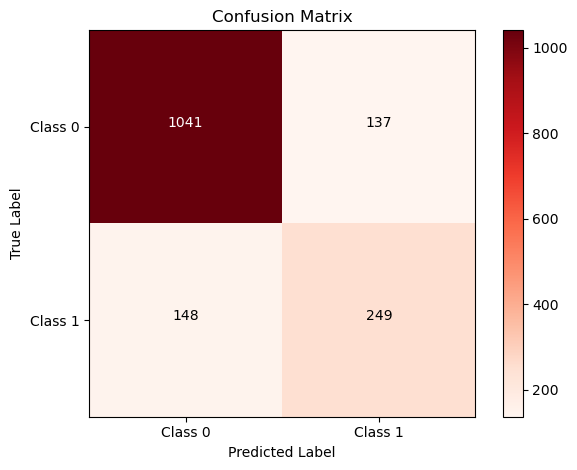

In [12]:
# Compute confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

# Define class labels 
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Add text annotations in each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


#### **F1 SCORE CALCULATION**

In [13]:
f1 = f1_score(y_test, binary_predictions)

print("F1 Score:", f1)

F1 Score: 0.636015325670498


### **USING TEST DATA TO MAKE PREDICTIONS**

#### **Load Test Data**
* *A total of 2250 Data Points with 1200 features in the Test dataset*

In [14]:
df_test = pd.read_csv('Dataset/test.csv')

In [15]:
# Splitting test data into features and id
df_test_features = df_test.drop(['id'], axis=1)
df_test_id = df_test[['id']]

In [16]:
test_features = df_test_features

In [17]:
test_features = test_features.to_numpy()

In [18]:
test_features = np.reshape(test_features, (-1, 20, 20, 3))

In [19]:
predictions_Test = cnnModel.predict(test_features)

71/71 [==============================] - 0s 3ms/step


In [20]:
binary_predictions_Test = (predictions_Test > 0.5).astype(int)

In [21]:
labels = pd.DataFrame(binary_predictions_Test)

### **SOLUTION DATAFRAME**

In [22]:
solDF = pd.DataFrame()
solDF['id'] = df_test_id
solDF['labels'] = labels

In [23]:
solDF.head(10)

,id,labels
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
5,6,1
6,7,0
7,8,0
8,9,1
9,10,1


### **EXPORTING SOLUTION**

In [31]:
solDF.to_csv('Solution.csv', index=False)